Agora com a target definida, vamos fazer algumas análises com ela.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df= pd.read_csv('gs://bucket-tcc-fia-mba/ABT/ABT_TARGET.csv')

In [6]:
df.shape

(98992, 442)

Histograma do percentual de professores formados no Ensino Superior

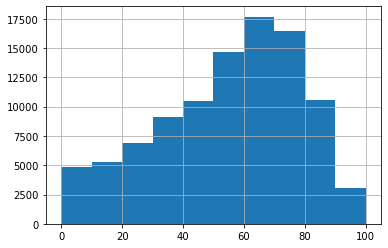

In [7]:
df['PC_FORMACAO_DOCENTE_FINAL'].hist()

Criação de faixas de percentual.

In [8]:
df['FX_FORMACAO_DOCENTE_FINAL']=pd.cut(x=df['PC_FORMACAO_DOCENTE_FINAL'], bins=10, labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])

In [9]:
df[['FX_FORMACAO_DOCENTE_FINAL', 'PC_FORMACAO_DOCENTE_FINAL']].tail(10)

,FX_FORMACAO_DOCENTE_FINAL,PC_FORMACAO_DOCENTE_FINAL
98982,80-90%,80.3
98983,80-90%,87.6
98984,70-80%,75.7
98985,70-80%,72.2
98986,60-70%,60.4
98987,70-80%,77.5
98988,80-90%,88.3
98989,80-90%,84.0
98990,70-80%,75.3
98991,80-90%,84.5


Histograma do número de alunos matriculados

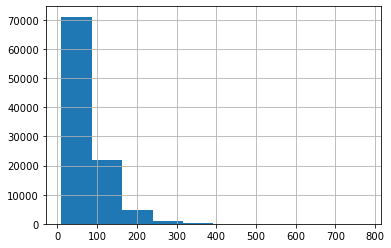

In [10]:
df['NU_MATRICULADOS_CENSO_9EF'].hist()

Novo histograma olhando agora apenas a concentração abaixo de 100.

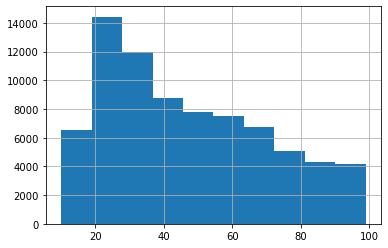

In [11]:
df[df['NU_MATRICULADOS_CENSO_9EF']<100]['NU_MATRICULADOS_CENSO_9EF'].hist()

Analisa volumes considerando 7 blocos

In [12]:
df['NU_MATRICULADOS_CENSO_9EF'].value_counts(bins=7)

(9.233, 119.429]      84470
(119.429, 228.857]    12997
(228.857, 338.286]     1369
(338.286, 447.714]      120
(447.714, 557.143]       28
(557.143, 666.571]        6
(666.571, 776.0]          2
Name: NU_MATRICULADOS_CENSO_9EF, dtype: int64

Cria faixas

In [13]:
df['FX_NU_MATRICULADOS_CENSO_9EF']=pd.cut(x=df['NU_MATRICULADOS_CENSO_9EF'], bins=[0,20,30,40,70,100,150,1000], labels=['0-20', '20-30', '30-40', '40-70', '70-100', '100-150', '>150'])

In [14]:
df['FX_NU_MATRICULADOS_CENSO_9EF'].value_counts()

40-70      25292
20-30      16241
70-100     15336
100-150    13703
30-40      11703
0-20        9095
>150        7622
Name: FX_NU_MATRICULADOS_CENSO_9EF, dtype: int64

Histograma do número de alunos presentes para realizar a prova

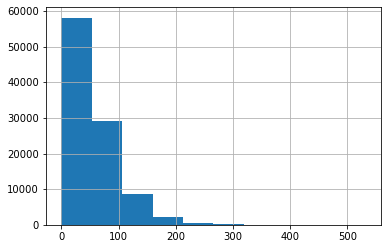

In [15]:
df['NU_PRESENTES_9EF'].hist()

Cria faixas

In [16]:
df['FX_NU_PRESENTES_9EF']=pd.cut(x=df['NU_PRESENTES_9EF'], bins=[0,20,30,40,70,100,150,1000], labels=['0-20', '20-30', '30-40', '40-70', '70-100', '100-150', '>150'])

In [17]:
df['FX_NU_PRESENTES_9EF'].value_counts()

40-70      25865
20-30      16807
0-20       16314
70-100     14199
30-40      12077
100-150     9882
>150        3847
Name: FX_NU_PRESENTES_9EF, dtype: int64

Histograma da taxa de participação dos alunos

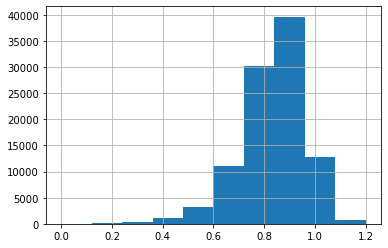

In [18]:
df['TAXA_PARTICIPACAO_9EF'].hist()

In [19]:
df['FX_TAXA_PARTICIPACAO_9EF']=pd.cut(x=df['TAXA_PARTICIPACAO_9EF'], bins=[0,.5,.7,.85,1,2], labels=['0-50%', '50-70%', '70-85%', '85-100%', '>100%'])

In [20]:
df['FX_TAXA_PARTICIPACAO_9EF'].value_counts()

85-100%    46024
70-85%     36473
50-70%     11138
>100%       3166
0-50%       2190
Name: FX_TAXA_PARTICIPACAO_9EF, dtype: int64

In [21]:
with pd.option_context("display.max_rows", 50, "display.max_columns", 500):
    display(df.head())

,ID_PROVA_BRASIL,ID_ESCOLA,ID_UF,ID_MUNICIPIO,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_FINAL,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_9EF,NU_PRESENTES_9EF,TAXA_PARTICIPACAO_9EF,TX_RESP_Q007,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,TX_RESP_Q011,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018,TX_RESP_Q019,TX_RESP_Q020,TX_RESP_Q021,TX_RESP_Q022,TX_RESP_Q023,TX_RESP_Q024,TX_RESP_Q025,TX_RESP_Q026,TX_RESP_Q027,TX_RESP_Q028,TX_RESP_Q029,TX_RESP_Q030,TX_RESP_Q031,TX_RESP_Q032,TX_RESP_Q033,TX_RESP_Q034,TX_RESP_Q035,TX_RESP_Q036,TX_RESP_Q037,TX_RESP_Q038,TX_RESP_Q039,TX_RESP_Q040,TX_RESP_Q041,TX_RESP_Q042,TX_RESP_Q043,TX_RESP_Q044,TX_RESP_Q045,TX_RESP_Q046,TX_RESP_Q047,TX_RESP_Q048,TX_RESP_Q049,TX_RESP_Q050,TX_RESP_Q051,TX_RESP_Q052,TX_RESP_Q053,TX_RESP_Q054,TX_RESP_Q055,TX_RESP_Q056,TX_RESP_Q057,TX_RESP_Q058,TX_RESP_Q059,TX_RESP_Q060,TX_RESP_Q061,TX_RESP_Q062,TX_RESP_Q063,TX_RESP_Q064,TX_RESP_Q065,TX_RESP_Q066,TX_RESP_Q067,TX_RESP_Q068,TX_RESP_Q069,TX_RESP_Q070,TX_RESP_Q071,TX_RESP_Q072,TX_RESP_Q073,TX_RESP_Q074,DIRETOR_TX_RESP_Q001,DIRETOR_TX_RESP_Q002,DIRETOR_TX_RESP_Q003,DIRETOR_TX_RESP_Q004,DIRETOR_TX_RESP_Q005,DIRETOR_TX_RESP_Q006,DIRETOR_TX_RESP_Q007,DIRETOR_TX_RESP_Q008,DIRETOR_TX_RESP_Q009,DIRETOR_TX_RESP_Q010,DIRETOR_TX_RESP_Q011,DIRETOR_TX_RESP_Q012,DIRETOR_TX_RESP_Q013,DIRETOR_TX_RESP_Q014,DIRETOR_TX_RESP_Q015,DIRETOR_TX_RESP_Q016,DIRETOR_TX_RESP_Q017,DIRETOR_TX_RESP_Q018,DIRETOR_TX_RESP_Q019,DIRETOR_TX_RESP_Q020,DIRETOR_TX_RESP_Q021,DIRETOR_TX_RESP_Q022,DIRETOR_TX_RESP_Q023,DIRETOR_TX_RESP_Q024,DIRETOR_TX_RESP_Q025,DIRETOR_TX_RESP_Q026,DIRETOR_TX_RESP_Q027,DIRETOR_TX_RESP_Q028,DIRETOR_TX_RESP_Q029,DIRETOR_TX_RESP_Q030,DIRETOR_TX_RESP_Q031,DIRETOR_TX_RESP_Q032,DIRETOR_TX_RESP_Q033,DIRETOR_TX_RESP_Q034,DIRETOR_TX_RESP_Q035,DIRETOR_TX_RESP_Q036,DIRETOR_TX_RESP_Q037,DIRETOR_TX_RESP_Q038,DIRETOR_TX_RESP_Q039,DIRETOR_TX_RESP_Q040,DIRETOR_TX_RESP_Q041,DIRETOR_TX_RESP_Q042,DIRETOR_TX_RESP_Q043,DIRETOR_TX_RESP_Q044,DIRETOR_TX_RESP_Q045,DIRETOR_TX_RESP_Q046,DIRETOR_TX_RESP_Q047,DIRETOR_TX_RESP_Q048,DIRETOR_TX_RESP_Q049,DIRETOR_TX_RESP_Q050,DIRETOR_TX_RESP_Q051,DIRETOR_TX_RESP_Q052,DIRETOR_TX_RESP_Q053,DIRETOR_TX_RESP_Q054,DIRETOR_TX_RESP_Q055,DIRETOR_TX_RESP_Q056,DIRETOR_TX_RESP_Q057,DIRETOR_TX_RESP_Q058,DIRETOR_TX_RESP_Q059,DIRETOR_TX_RESP_Q060,DIRETOR_TX_RESP_Q061,DIRETOR_TX_RESP_Q062,DIRETOR_TX_RESP_Q063,DIRETOR_TX_RESP_Q064,DIRETOR_TX_RESP_Q065,DIRETOR_TX_RESP_Q066,DIRETOR_TX_RESP_Q067,DIRETOR_TX_RESP_Q068,DIRETOR_TX_RESP_Q069,DIRETOR_TX_RESP_Q070,DIRETOR_TX_RESP_Q071,DIRETOR_TX_RESP_Q072,DIRETOR_TX_RESP_Q073,DIRETOR_TX_RESP_Q074,DIRETOR_TX_RESP_Q075,DIRETOR_TX_RESP_Q076,DIRETOR_TX_RESP_Q077,DIRETOR_TX_RESP_Q078,DIRETOR_TX_RESP_Q079,DIRETOR_TX_RESP_Q080,DIRETOR_TX_RESP_Q081,DIRETOR_TX_RESP_Q082,DIRETOR_TX_RESP_Q083,DIRETOR_TX_RESP_Q084,DIRETOR_TX_RESP_Q085,DIRETOR_TX_RESP_Q086,DIRETOR_TX_RESP_Q087,DIRETOR_TX_RESP_Q088,DIRETOR_TX_RESP_Q089,DIRETOR_TX_RESP_Q090,DIRETOR_TX_RESP_Q091,DIRETOR_TX_RESP_Q092,DIRETOR_TX_RESP_Q093,DIRETOR_TX_RESP_Q094,DIRETOR_TX_RESP_Q095,DIRETOR_TX_RESP_Q096,DIRETOR_TX_RESP_Q097,DIRETOR_TX_RESP_Q098,DIRETOR_TX_RESP_Q099,DIRETOR_TX_RESP_Q100,DIRETOR_TX_RESP_Q101,DIRETOR_TX_RESP_Q102,DIRETOR_TX_RESP_Q103,DIRETOR_TX_RESP_Q104,DIRETOR_TX_RESP_Q105,DIRETOR_TX_RESP_Q106,DIRETOR_TX_RESP_Q107,DIRETOR_TX_RESP_Q108,DIRETOR_TX_RESP_Q109,DIRETOR_TX_RESP_Q110,DIRETOR_TX_RESP_Q111,PROF_LP_TX_RESP_Q001,PROF_LP_TX_RESP_Q002,PROF_LP_TX_RESP_Q003,PROF_LP_TX_RESP_Q004,PROF_LP_TX_RESP_Q005,PROF_LP_TX_RESP_Q006,PROF_LP_TX_RESP_Q007,PROF_LP_TX_RESP_Q008,PROF_LP_TX_RESP_Q009,PROF_LP_TX_RESP_Q010,PROF_LP_TX_RESP_Q011,PROF_LP_TX_RESP_Q012,PROF_LP_TX_RESP_Q013,PROF_LP_TX_RESP_Q014,PROF_LP_TX_RESP_Q015,PROF_LP_TX_RESP_Q016,PROF_LP_TX_RESP_Q017,PROF_LP_TX_RESP_Q018,PROF_LP_TX_RESP_Q019,PROF_LP_TX_RESP_Q020,PROF_LP_TX_RESP_Q021,PROF_LP_TX_RESP_Q022,PROF_LP_TX_RESP_Q023,PROF_LP_TX_RESP_Q024,PROF_LP_TX_RESP_Q025,PROF_LP_TX_RESP_Q026,PROF_LP_TX_RESP_Q027,PROF_LP_TX_RESP_Q028,PROF

Preenchendo valores vazios

In [22]:
df['NIVEL_SOCIO_ECONOMICO']=df['NIVEL_SOCIO_ECONOMICO'].fillna('ND')

In [23]:
df['FX_FORMACAO_DOCENTE_FINAL']=df['FX_FORMACAO_DOCENTE_FINAL'].cat.add_categories('ND')
df['FX_FORMACAO_DOCENTE_FINAL'].fillna('ND', inplace=True)

In [24]:
df['FX_NU_PRESENTES_9EF']=df['FX_NU_PRESENTES_9EF'].cat.add_categories('ND')
df['FX_NU_PRESENTES_9EF'].fillna('ND', inplace=True)

In [25]:
df['FX_TAXA_PARTICIPACAO_9EF']=df['FX_TAXA_PARTICIPACAO_9EF'].cat.add_categories('ND')
df['FX_TAXA_PARTICIPACAO_9EF'].fillna('ND', inplace=True)

In [26]:
df['ID_PROVA_BRASIL'].value_counts(sort=False)

2013    31776
2015    30161
2017    37055
Name: ID_PROVA_BRASIL, dtype: int64

Criação da variável target final

In [27]:
df['TARGET'] =  (df['TARGET_MT9']+df['TARGET_LP9']).apply(lambda x: 1 if x>0 else 0)

Describe da variável resposta. TARGET = 1

In [28]:
df[df['TARGET']==1].describe().drop(columns=['ID_ESCOLA', 'ID_MUNICIPIO','ID_PROVA_BRASIL','ID_UF','ID_DEPENDENCIA_ADM','ID_LOCALIZACAO','TARGET_LP9','TARGET_MT9','TARGET'])

,PC_FORMACAO_DOCENTE_FINAL,NU_MATRICULADOS_CENSO_9EF,NU_PRESENTES_9EF,TAXA_PARTICIPACAO_9EF
count,10457.000000,10457.000000,10457.000000,10457.000000
mean,64.441073,66.958975,59.203691,0.887289
std,19.661892,49.128705,43.982682,0.113526
min,0.000000,10.000000,1.000000,0.043478
25%,54.000000,30.000000,26.000000,0.840909
50%,67.200000,55.000000,48.000000,0.907692
75%,78.600000,92.000000,80.000000,0.960000
max,100.000000,463.000000,397.000000,1.181818


Describe da variável resposta. TARGET = 0

In [29]:
df[df['TARGET']==0].describe().drop(columns=['ID_ESCOLA', 'ID_MUNICIPIO','ID_PROVA_BRASIL','ID_UF','ID_DEPENDENCIA_ADM','ID_LOCALIZACAO','TARGET_LP9','TARGET_MT9','TARGET'])

,PC_FORMACAO_DOCENTE_FINAL,NU_MATRICULADOS_CENSO_9EF,NU_PRESENTES_9EF,TAXA_PARTICIPACAO_9EF
count,88531.000000,88535.000000,88535.000000,88535.000000
mean,53.569823,69.287321,56.305450,0.825648
std,23.755633,52.829559,42.410687,0.129385
min,0.000000,10.000000,0.000000,0.000000
25%,36.700000,30.000000,25.000000,0.758929
50%,57.300000,55.000000,44.000000,0.842105
75%,72.200000,93.000000,76.000000,0.913043
max,100.000000,776.000000,532.000000,1.200000


Agrupa os dados em cubo único para analisar as variáveis no excel.

In [30]:
df_agr = df.groupby(['ID_PROVA_BRASIL','ID_UF','ID_MUNICIPIO','ID_DEPENDENCIA_ADM','ID_LOCALIZACAO','NIVEL_SOCIO_ECONOMICO',
                    'FX_FORMACAO_DOCENTE_FINAL','FX_NU_PRESENTES_9EF','FX_NU_MATRICULADOS_CENSO_9EF', 'FX_TAXA_PARTICIPACAO_9EF',
                    'TARGET_MT9', 'TARGET_LP9'], observed=True)[['ID_ESCOLA']].count().reset_index().rename(columns={'ID_ESCOLA': 'QTD'})

In [31]:
df_agr.shape

(90744, 13)

In [32]:
df_agr.groupby(['ID_PROVA_BRASIL']).sum()

,ID_UF,ID_MUNICIPIO,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,TARGET_MT9,TARGET_LP9,QTD
ID_PROVA_BRASIL,,,,,,,
2013,913047,93547758079,71459,33687,394,1580,31776
2015,868228,88620750940,68371,32322,400,2696,30161
2017,1073306,108632391796,87101,43433,819,5707,37055


In [33]:
tb_municipios = pd.read_csv('gs://bucket-tcc-fia-mba/RELATORIO_DTB_BRASIL_MUNICIPIO.csv', sep = ';', encoding='utf-8')
tb_municipios.head()

,UF,Nome_UF,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,11,Rondônia,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN
1,11,Rondônia,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis,NaN,NaN,NaN,NaN,NaN,NaN
2,11,Rondônia,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Rondônia,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN
4,11,Rondônia,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_agr = pd.merge(df_agr, tb_municipios[['Nome_Município','Código Município Completo','Nome_Mesorregião']], how='left', left_on=['ID_MUNICIPIO'], right_on=['Código Município Completo']).drop(columns=['Código Município Completo'])

Algumas cidades que tem código começando em 6 são ficticias (não entendi o motivo), portanto preenchi com este nome.

In [35]:
df_agr['Nome_Município'].fillna('Fictício',inplace=True)
df_agr['Nome_Mesorregião'].fillna('Fictício',inplace=True)

In [36]:
tb_uf = tb_municipios[['UF', 'Nome_UF']].groupby(['UF', 'Nome_UF']).count().reset_index()
tb_uf.head()

,UF,Nome_UF
0,11,Rondônia
1,12,Acre
2,13,Amazonas
3,14,Roraima
4,15,Pará


In [37]:
df_agr = pd.merge(df_agr, tb_uf[['Nome_UF', 'UF']], how='left', left_on=['ID_UF'], right_on=['UF']).drop(columns=['UF']).rename(columns={'Nome_Município': 'NOME_MUNICIPIO', 'Nome_Mesorregião':'NOME_MESORREGIAO'})

In [38]:
df_agr['Nome_UF'].isnull().sum(), df_agr['NOME_MUNICIPIO'].isnull().sum(), df_agr['NOME_MESORREGIAO'].isnull().sum()

(0, 0, 0)

Grava cubo final no Storage.

In [39]:
df_agr.to_csv('gs://bucket-tcc-fia-mba/ABT/CUBO.csv', encoding='utf-8', sep=';')